In [ ]:
"""
YOLOv8 Training Script for Google Colab
This script sets up the environment, downloads your Roboflow dataset, and trains a YOLOv8 model.
"""

# INITIAL SETUP
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
from ultralytics import YOLO
import os
from google.colab import drive
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Mount Google Drive to save models
drive.mount('/content/drive')
save_dir = '/content/drive/MyDrive/yolov8_training'
os.makedirs(save_dir, exist_ok=True)

Mounted at /content/drive


In [ ]:
# DOWNLOAD DATASET FROM ROBOFLOW
rf = Roboflow(api_key="GxIQV8VK2SzzOLiapv3z")
project = rf.workspace("ais4002-assigment").project("my-first-project-cyllk")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-2 in yolov8:: 100%|██████████| 1344/1344 [00:00<00:00, 5096.85it/s]


In [ ]:
# Print dataset information
print(f"Dataset downloaded to: {dataset.location}")
print(f"Data configuration file: {dataset.location}/data.yaml")

Dataset downloaded to: /content/My-First-Project-2
Data configuration file: /content/My-First-Project-2/data.yaml


In [ ]:
# Download pre-trained weights (not needed as they're automatically downloaded)
model = YOLO('yolov8n.pt')  # Use nano model for small dataset

100%|██████████| 6.25M/6.25M [00:00<00:00, 404MB/s]


In [ ]:
# Similar parameters to your YOLOv12 script
epochs = 100             # For small dataset, 100-150 epochs is often sufficient
batch_size = 16          # Smaller batch size for limited VRAM
image_size = 640         # Standard YOLOv8 input size
patience = 20            # Early stopping patience

# Start training
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=epochs,
    batch=batch_size,
    imgsz=image_size,
    patience=patience,
    scale=0.5,           # Scaling augmentation
    mosaic=1.0,          # Mosaic augmentation
    mixup=0.0,           # Mixup augmentation (disabled)
    copy_paste=0.1,      # Copy-paste augmentation
    project=save_dir,
    name='yolov8n_custom',
    exist_ok=True,
    pretrained=True,
    optimizer="AdamW",   # Advanced optimizer
    cos_lr=True,         # Cosine learning rate schedule
    lr0=0.001,           # Initial learning rate
    lrf=0.01,            # Final learning rate ratio
    weight_decay=0.0001, # Weight decay
    warmup_epochs=3,     # Warmup epochs
    close_mosaic=10,     # Disable mosaic augmentation in final epochs
    seed=0,              # For reproducibility
    device=0,            # Use GPU 0
)

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/My-First-Project-2/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/yolov8_training, name=yolov8n_custom, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 92.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 272MB/s]


AMP: checks passed ✅


train: Scanning /content/My-First-Project-2/train/labels... 603 images, 255 backgrounds, 0 corrupt: 100%|██████████| 603/603 [00:00<00:00, 2724.66it/s]

train: New cache created: /content/My-First-Project-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/My-First-Project-2/valid/labels... 42 images, 24 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 1315.57it/s]

val: New cache created: /content/My-First-Project-2/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolov8_training/yolov8n_custom/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8_training/yolov8n_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.07G      2.064      3.137      1.616         27        640: 100%|██████████| 38/38 [00:13<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         42         87       0.45       0.31      0.374      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.56G      2.033      2.152      1.566         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         42         87      0.386      0.402      0.366      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.57G      2.016      2.131       1.52         27        640: 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


                   all         42         87      0.686      0.529      0.636      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.59G      1.983       1.96      1.482         19        640: 100%|██████████| 38/38 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         42         87      0.593      0.678      0.649      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.61G      1.911      1.939      1.486         15        640: 100%|██████████| 38/38 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         42         87      0.705      0.655      0.701      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.62G       1.95      1.768      1.466         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         42         87       0.73      0.497      0.573      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.64G      1.922      1.757      1.475         31        640: 100%|██████████| 38/38 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         42         87      0.692      0.713      0.724      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.66G      1.832      1.704      1.456         27        640: 100%|██████████| 38/38 [00:10<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         42         87      0.662      0.699      0.719      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.68G      1.904      1.738      1.478         32        640: 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         42         87       0.75      0.724      0.783      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.69G      1.857      1.649      1.464         26        640: 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         42         87      0.822      0.678      0.788      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.71G      1.889       1.61      1.452         29        640: 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         42         87      0.663      0.678      0.709      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.73G      1.777       1.55      1.411         28        640: 100%|██████████| 38/38 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         42         87      0.746      0.701       0.75      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.74G      1.753      1.492      1.382         36        640: 100%|██████████| 38/38 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         42         87      0.823      0.746      0.836      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.76G      1.809       1.46      1.431         37        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         42         87      0.823      0.642      0.717      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.78G      1.777      1.429      1.398         46        640: 100%|██████████| 38/38 [00:10<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         42         87      0.743      0.816      0.836      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.79G      1.763      1.488       1.41         22        640: 100%|██████████| 38/38 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         42         87      0.886      0.759      0.851      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.81G      1.711      1.375      1.356         72        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         42         87      0.829      0.671      0.759        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.83G      1.683      1.326      1.345         26        640: 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         42         87      0.789      0.724      0.784      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.85G      1.742      1.364      1.355         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         42         87      0.813      0.747      0.818      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.86G      1.694      1.369      1.344         44        640: 100%|██████████| 38/38 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         42         87      0.819      0.779      0.801      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.88G      1.726      1.363      1.371         26        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         42         87      0.835      0.697      0.746       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.9G      1.628      1.327      1.362         35        640: 100%|██████████| 38/38 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         42         87      0.742      0.759      0.769      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.91G      1.626      1.324      1.323         16        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


                   all         42         87      0.823      0.736      0.831      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.93G      1.658      1.367      1.346         15        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         42         87      0.779      0.862      0.859      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.95G      1.615       1.25      1.324         43        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         42         87      0.849      0.759      0.812       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.97G      1.713      1.273      1.371         37        640: 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         42         87      0.846      0.701      0.834      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.98G      1.629      1.234      1.337         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         42         87      0.782      0.736      0.787      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         3G      1.666      1.268      1.351         32        640: 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         42         87      0.853      0.759      0.837      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.02G      1.587        1.2      1.335         27        640: 100%|██████████| 38/38 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         42         87      0.842      0.736      0.834      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.04G      1.693      1.266      1.365         43        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         42         87      0.768      0.761      0.808      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.05G      1.587      1.234      1.301         27        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         42         87      0.892      0.756      0.829      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.07G       1.61      1.195      1.314         74        640: 100%|██████████| 38/38 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         42         87      0.876      0.809      0.854       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.09G      1.621      1.176       1.33         29        640: 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         42         87      0.848      0.701      0.819      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.1G      1.597      1.154      1.327         25        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         42         87      0.879      0.747      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.12G      1.553      1.163        1.3         21        640: 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         42         87      0.829      0.781      0.846      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.14G      1.622      1.196      1.318         18        640: 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         42         87      0.847      0.793      0.856      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.15G      1.571      1.111      1.309         22        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         42         87      0.883      0.782      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.17G      1.559      1.082      1.284         52        640: 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


                   all         42         87      0.776      0.816      0.835      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.19G      1.525      1.087      1.277         38        640: 100%|██████████| 38/38 [00:11<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         42         87      0.855      0.793      0.862      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.21G      1.579      1.118      1.288         17        640: 100%|██████████| 38/38 [00:11<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         42         87      0.827      0.825      0.865      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.22G      1.576      1.183      1.308         16        640: 100%|██████████| 38/38 [00:10<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         42         87      0.842       0.77      0.847      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.24G      1.511      1.055      1.282         57        640: 100%|██████████| 38/38 [00:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         42         87      0.857      0.825      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.26G      1.524      1.048      1.263         38        640: 100%|██████████| 38/38 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         42         87      0.875       0.77      0.849      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.27G      1.475      1.043      1.246         29        640: 100%|██████████| 38/38 [00:10<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         42         87      0.879       0.77      0.836      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.29G      1.524      1.052      1.285         25        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         42         87      0.867      0.822      0.861        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.31G      1.479      1.026      1.253         34        640: 100%|██████████| 38/38 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         42         87      0.855      0.811      0.866      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.32G      1.472      1.027      1.221         25        640: 100%|██████████| 38/38 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


                   all         42         87       0.93      0.816      0.892      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.34G      1.468      1.005      1.225         51        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         42         87      0.882      0.724      0.837      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.36G      1.462     0.9839       1.24         31        640: 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         42         87        0.9      0.782      0.883        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.38G      1.474     0.9829      1.257         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         42         87       0.88      0.793      0.862      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.39G      1.501     0.9902      1.254         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         42         87       0.84      0.786      0.854      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.41G       1.42      1.002      1.213         34        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         42         87      0.859      0.851      0.904      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.43G       1.37      0.971        1.2         34        640: 100%|██████████| 38/38 [00:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         42         87      0.805      0.793       0.87      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.44G      1.373     0.9446       1.21         46        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         42         87      0.905      0.763      0.884      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.46G      1.443     0.9671       1.24         30        640: 100%|██████████| 38/38 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         42         87      0.888      0.816      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.48G      1.418      0.979      1.219         23        640: 100%|██████████| 38/38 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         42         87      0.923      0.759      0.858      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       3.5G      1.364     0.9394      1.211         28        640: 100%|██████████| 38/38 [00:12<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         42         87      0.846      0.793      0.851       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.51G      1.371     0.9001      1.187         42        640: 100%|██████████| 38/38 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         42         87      0.835      0.862      0.891      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.53G      1.402     0.9583      1.225         15        640: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         42         87      0.815      0.885      0.888      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.55G      1.346     0.8887      1.193         39        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         42         87      0.887      0.814      0.881      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.56G      1.329     0.8855      1.179         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         42         87      0.903      0.793      0.875      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.58G      1.332     0.8612      1.179         38        640: 100%|██████████| 38/38 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


                   all         42         87      0.832      0.851      0.867      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.6G      1.322     0.8556      1.174         47        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         42         87        0.9      0.825      0.871      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.62G      1.348     0.8936      1.186         23        640: 100%|██████████| 38/38 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         42         87      0.909      0.808      0.862      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.63G      1.327     0.8659      1.163         34        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         42         87      0.813      0.852      0.864      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.65G        1.3     0.8641      1.166         44        640: 100%|██████████| 38/38 [00:09<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         42         87      0.833      0.862      0.869      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.67G       1.27     0.8244      1.144         22        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         42         87      0.847      0.839      0.872      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.68G      1.348     0.8998      1.187         27        640: 100%|██████████| 38/38 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         42         87      0.936      0.793       0.89      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.7G      1.304     0.8532      1.172         20        640: 100%|██████████| 38/38 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         42         87      0.852      0.851      0.873      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.72G       1.32     0.8825      1.179         36        640: 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         42         87      0.842      0.862      0.879      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.73G       1.25      0.802      1.121         34        640: 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


                   all         42         87      0.841      0.852      0.885      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.75G      1.266     0.8457      1.139         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         42         87      0.828      0.862      0.868      0.622


EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 52, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

72 epochs completed in 0.238 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8_training/yolov8n_custom/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/yolov8_training/yolov8n_custom/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/yolov8_training/yolov8n_custom/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]


                   all         42         87      0.858      0.851      0.904      0.646
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8_training/yolov8n_custom


In [ ]:
# VALIDATE THE TRAINED MODEL
metrics = model.val(data=f"{dataset.location}/data.yaml")
print(f"Validation metrics: {metrics}")


Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/My-First-Project-2/valid/labels.cache... 42 images, 24 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all         42         87      0.858      0.851      0.904      0.646
Speed: 8.5ms preprocess, 11.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8_training/yolov8n_custom
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a08356c5a10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0

In [ ]:
# EXPORT THE MODEL
# Get the path of the best weights
weights_dir = os.path.join(save_dir, 'yolov8n_custom', 'weights')
best_pt = os.path.join(weights_dir, 'best.pt')

# Export to ONNX format
model.export(format="onnx", imgsz=image_size)  # Creates best.onnx in the same folder

# Print actual paths for both PT and ONNX models
print(f"PyTorch model saved at: {best_pt}")
print(f"ONNX model exported to: {os.path.join(weights_dir, 'best.onnx')}")

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/yolov8_training/yolov8n_custom/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 327.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 342.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 196.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 147.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 189.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 18.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export wi

Running inference on: /content/My-First-Project-2/test/images/opera_OrKzjF6kU5_crop_1_1_jpg.rf.e1e1e16945f55c83c4727815317b34e6.jpg

image 1/1 /content/My-First-Project-2/test/images/opera_OrKzjF6kU5_crop_1_1_jpg.rf.e1e1e16945f55c83c4727815317b34e6.jpg: 640x640 10 vehicles, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/yolov8_training/yolov8n_custom
Inference results saved to: /content/drive/MyDrive/yolov8_training/yolov8n_custom


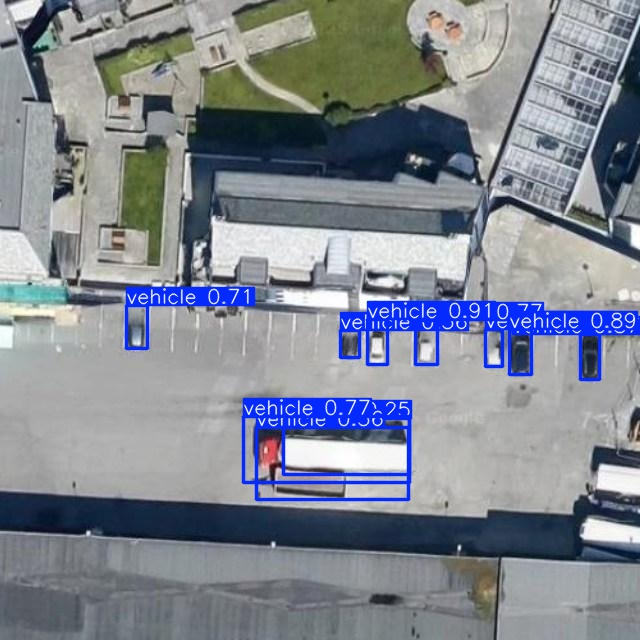

In [ ]:
# RUN INFERENCE ON A TEST IMAGE
# Find all test images in the directory
import glob

# Get a list of all test images
test_image_dir = f"{dataset.location}/test/images"
test_images = glob.glob(f"{test_image_dir}/*.jpg") + glob.glob(f"{test_image_dir}/*.jpeg") + glob.glob(f"{test_image_dir}/*.png")

if test_images:
    # Use the first test image found
    test_image_path = test_images[9]
    print(f"Running inference on: {test_image_path}")
    # Perform inference
    results = model.predict(test_image_path, save=True, conf=0.25)
    print(f"Inference results saved to: {results[0].save_dir}")

    # If you want to display the results directly in Colab
    from IPython.display import Image, display
    display(Image(os.path.join(results[0].save_dir, os.path.basename(test_image_path))))
else:
    print(f"No test images found in {test_image_dir}")
    print("Try running inference on a specific image with:")
    print("model.predict('/path/to/your/image.jpg', save=True, conf=0.25)")

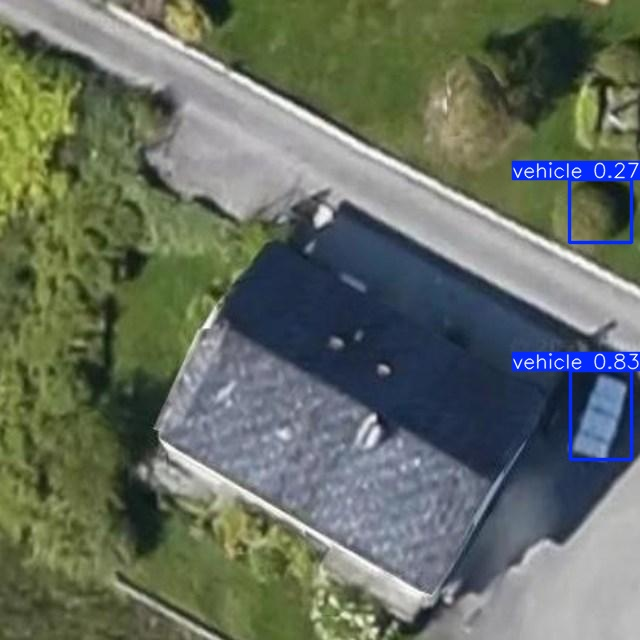

Training, validation, and export complete!


In [ ]:
# If you want to display the results directly in Colab
from IPython.display import Image, display
display(Image(os.path.join(results[0].save_dir, os.path.basename(test_image_path))))

print("Training, validation, and export complete!")